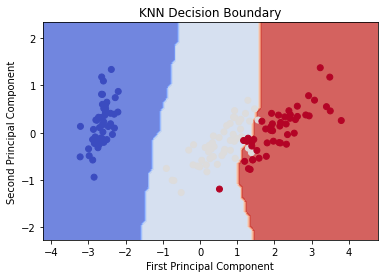

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier

# load the iris dataset as an example
iris = datasets.load_iris()
X = iris.data
y = iris.target

# perform PCA to reduce the data to 2 dimensions for visualization purposes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# create and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_pca, y)

# plot the decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm)
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('KNN Decision Boundary')

plt.show()
